In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_bank = pd.read_csv("../01_base/bank.csv")

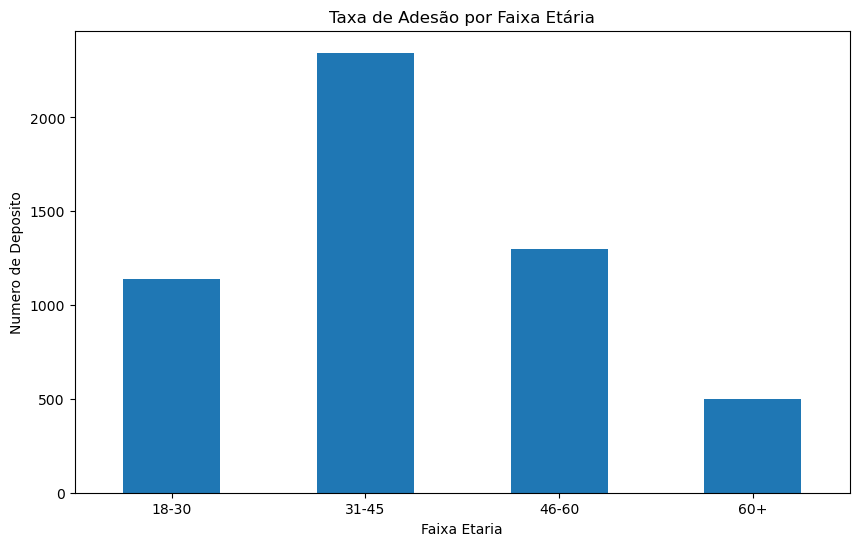

In [3]:
#* 📌 **Exercício 6:** Taxa de adesão ao depósito por faixa etária (ex.: 18-30, 31-45, 46-60, 60+).

bins = [18, 30, 45, 60, float("inf")]
labels = ["18-30", "31-45", "46-60", "60+"]
base_bank["faixa_etaria"] = pd.cut(base_bank["age"], bins=bins, labels=labels, right=True)

venda_por_idade = base_bank[base_bank["deposit"] == "yes"].groupby("faixa_etaria", observed=True)["deposit"].count()

plt.figure(figsize=(10, 6))
venda_por_idade.plot(kind="bar")

plt.title("Taxa de Adesão por Faixa Etária")
plt.xlabel("Faixa Etaria")
plt.ylabel("Numero de Deposito")

plt.xticks(rotation=0)
plt.show()


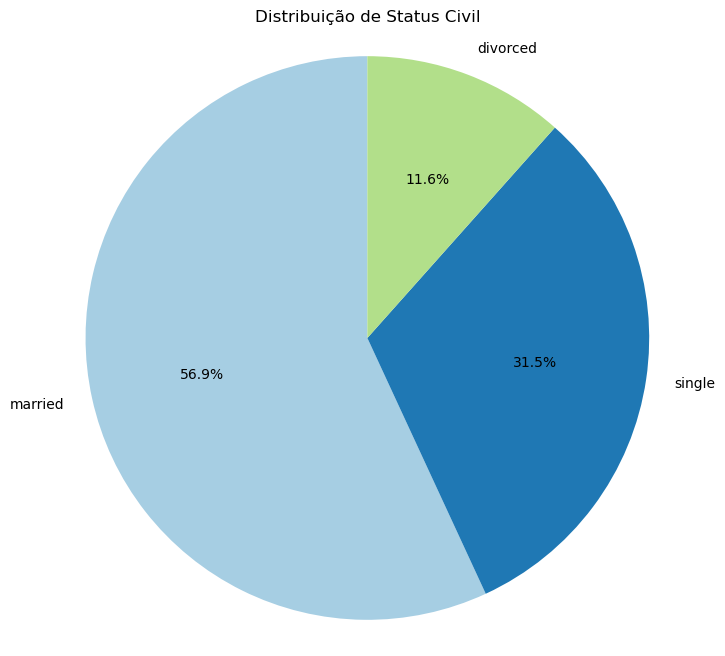

In [4]:
#* 📌 **Exercício 7:** Comparar taxa de adesão entre solteiros, casados e divorciados.

status_civil =base_bank["marital"].value_counts()

labels = status_civil.index
sizes = status_civil.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)

plt.title("Distribuição de Status Civil")
plt.axis("equal")
plt.show()

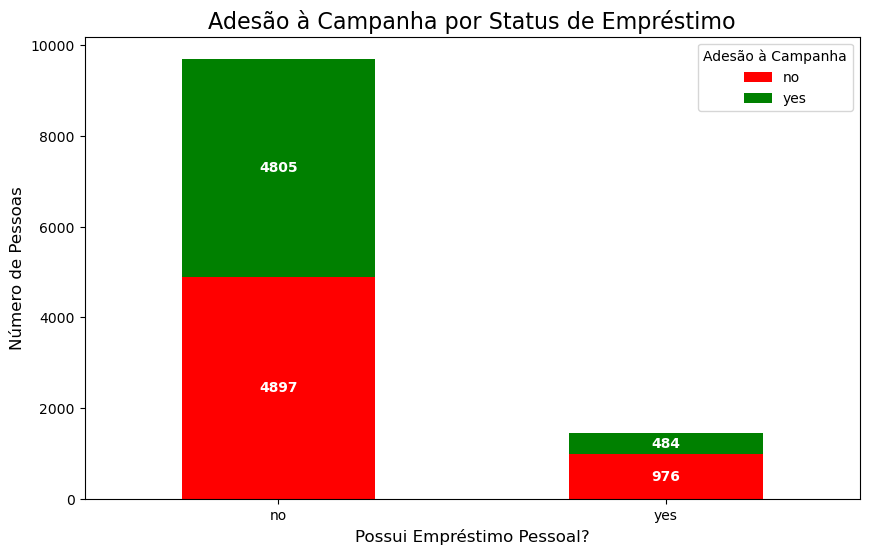

In [5]:
#* 📌 **Exercício 8:** Verificar se quem já tinha **empréstimo pessoal (`loan`)** respondeu mais ou menos à campanha.

aderencia = pd.crosstab(base_bank["loan"], base_bank["deposit"])

aderencia.plot(kind="bar", stacked=True, figsize=(10,6), color= ["red", "green"])
plt.title('Adesão à Campanha por Status de Empréstimo', fontsize=16)
plt.xlabel('Possui Empréstimo Pessoal?', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Adesão à Campanha', loc='upper right')

for i, (index, row) in enumerate(aderencia.iterrows()): # Este loop itera sobre cada barra (yes/no) e adiciona o valor correspondente
    plt.text(i, row["no"] / 2, str(row["no"]), ha="center", va="center", color="white", fontweight="bold")
    plt.text(i, row["no"] + row["yes"] / 2, str(row["yes"]), ha="center", va="center", color="white", fontweight="bold")

plt.show()

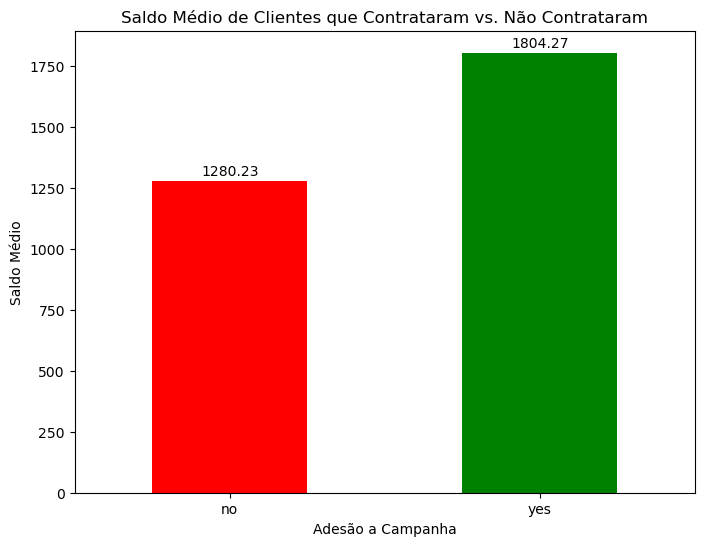

In [6]:
#* 📌 **Exercício 9:** Analisar o saldo médio de quem contratou vs quem não contratou.

saldo_medio = round(base_bank.groupby("deposit")["balance"].mean(), 2)

plt.figure(figsize=(8, 6))
saldo_medio.plot(kind="bar", color=["red", "green"])
plt.title("Saldo Médio de Clientes que Contrataram vs. Não Contrataram")
plt.xlabel("Adesão a Campanha")
plt.ylabel("Saldo Médio")
plt.xticks(rotation=0)


for index, value in enumerate(saldo_medio):
    plt.text(index, value + 10, f"{value:.2f}", ha="center", va="bottom")

plt.show()

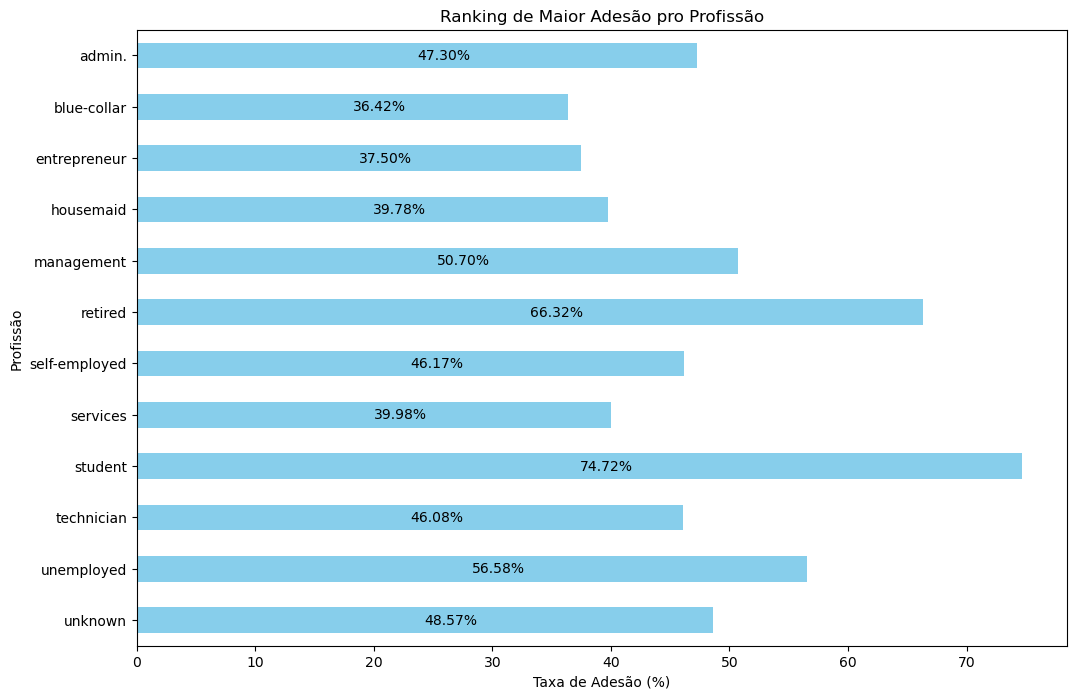

In [7]:
# * 📌 **Exercício 10:** Ranking de profissões com maior taxa de adesão.

profissoes_aderencia = round(base_bank.groupby("job")["deposit"].apply(lambda x: (x == "yes").mean() * 100), 2)

plt.figure(figsize=(12, 8))
profissoes_aderencia.plot(kind= "barh", color= "skyblue")
plt.title("Ranking de Maior Adesão pro Profissão")
plt.xlabel("Taxa de Adesão (%)")
plt.ylabel("Profissão")

for index, value in enumerate(profissoes_aderencia):
    plt.text(value / 2, index, f"{value:.2f}%", ha= "left", va= "center")


plt.gca().invert_yaxis()
plt.show()